### Learn how to handle Missing Data on numerical and categorical data.

In [803]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline # Import Pipeline from sklearn

In [986]:
df = pd.read_csv('resampled_data1.csv')
df.head()

,Unnamed: 0,index,invoice_no,customer_id,gender,age,category,quantity,Price,payment_method,invoice_date,shopping_mall
0,1034,76296,I259147,C826416,Female,40.0,Shoes,5,3000.85,Debit Card,2/12/22,Metrocity
1,3178,52180,I718972,C551477,Female,18.0,Cosmetics,1,40.66,Debit Card,5/3/21,Mall of Istanbul
2,3001,92441,I127560,C743112,Male,46.0,Toys,4,143.36,Credit Card,8/1/21,Cevahir AVM
3,2487,75718,I307745,C206683,Female,53.0,Shoes,2,1200.34,Cash,7/9/21,Kanyon
4,2807,25918,I774065,C437365,Male,69.0,Clothing,4,1200.32,Credit Card,11/5/22,Metrocity


In [988]:
df.isnull().sum()

Unnamed: 0         0
index              0
invoice_no         0
customer_id        0
gender            12
 age              10
category           6
quantity           0
Price             15
payment_method     6
invoice_date       0
shopping_mall     10
dtype: int64

In [990]:
df = df.rename({' age ': 'age', 'invoice_date':'Datetime'}, axis=1)

In [992]:
df.columns

Index(['Unnamed: 0', 'index', 'invoice_no', 'customer_id', 'gender', 'age',
       'category', 'quantity', 'Price', 'payment_method', 'Datetime',
       'shopping_mall'],
      dtype='object')

In [994]:
df = df.rename(columns=str.capitalize)
df.head()

,Unnamed: 0,Index,Invoice_no,Customer_id,Gender,Age,Category,Quantity,Price,Payment_method,Datetime,Shopping_mall
0,1034,76296,I259147,C826416,Female,40.0,Shoes,5,3000.85,Debit Card,2/12/22,Metrocity
1,3178,52180,I718972,C551477,Female,18.0,Cosmetics,1,40.66,Debit Card,5/3/21,Mall of Istanbul
2,3001,92441,I127560,C743112,Male,46.0,Toys,4,143.36,Credit Card,8/1/21,Cevahir AVM
3,2487,75718,I307745,C206683,Female,53.0,Shoes,2,1200.34,Cash,7/9/21,Kanyon
4,2807,25918,I774065,C437365,Male,69.0,Clothing,4,1200.32,Credit Card,11/5/22,Metrocity


In [996]:
df = df.drop(labels=['Unnamed: 0', 'Index', 'Invoice_no','Customer_id'], axis=1)

In [998]:
# Row count

df.dtypes

Gender             object
Age               float64
Category           object
Quantity            int64
Price             float64
Payment_method     object
Datetime           object
Shopping_mall      object
dtype: object

In [1044]:
dfc1 = df.copy()

## ---------------------------------------------------------------------------------------------------

## Mean Median Imputer

`# Set up the imputer`
`mmi = MeanMedianImputer(`
        `imputation_method='mean',`
        `variables=['col_name1', 'col_name2']`
`)`

`# Fit transformer with training data`
`mmi.fit(df)`

We assess the distribution. We will replace the values with the median. (Hint: Each column has 5342 values; thus, it can take some time to calculate distributions. Also, we cut our values to -50 : 50 range by `df.query()`. We will delve into handling outliers in future topics).

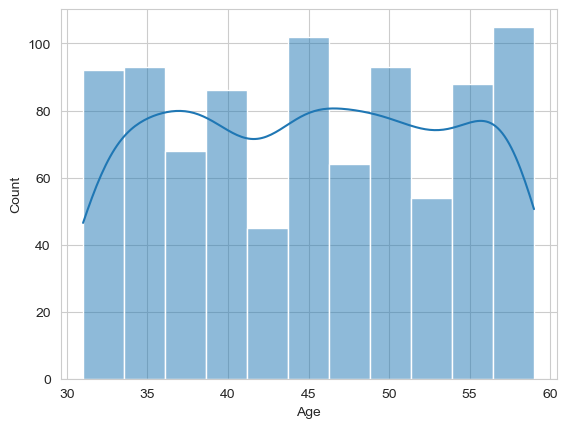

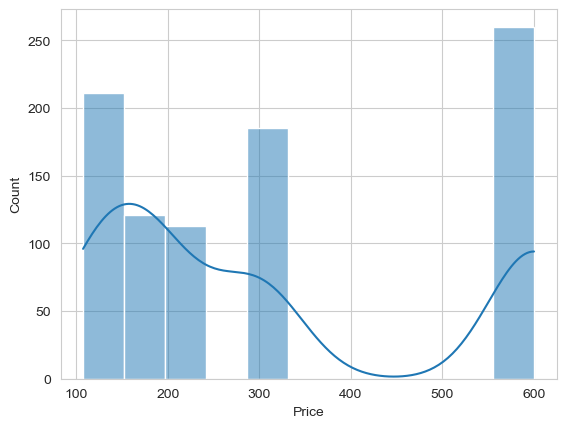

In [1016]:
sns.set_style('whitegrid')
for col in ['Age', 'Price']:
  sns.histplot(data=dfc1.query('Age > 30 & Price > 100 & Age < 60 & Price < 700'), 
               x = col, kde = True)
  plt.show()
  print('\n')

We load and set the transformer. The arguments are:
* imputation_method: either mean or median
* variables: list of numerical variables to apply the method to. If you don't pass in anything here, the transformer will consider all numerical variables.

In [1019]:
from feature_engine.imputation import MeanMedianImputer
imputer = MeanMedianImputer(imputation_method='median',
                            variables=['Age' , 'Price'])

We use the `.fit()` method so the transformer can learn the median values from the selected variables. The argument is the dataset you are interested to learn from.

In [1022]:
imputer.fit(dfc1)

MeanMedianImputer(variables=['Age', 'Price'])

As a confirmation step, let's check the learned values with the attribute `.imputer_dict_`

In [1025]:
imputer.imputer_dict_

{'Age': 44.0, 'Price': 300.08}

We now transform the data, which means we replace the missing data of each variable according to its respective learned median value. We use `.transform()` method. The argument is the dataset you want to transform.

In [1028]:
dfc1 = imputer.transform(dfc1)

Check the output, it is a DataFrame.
* At first, we may think this is a minor detail; however, other libraries for feature engineering, like scikit-learn, return, as an array, a ``.transform()`` command when doing a data transformation.

Let's check missing levels on `['Age', 'Price']`. They were replaced with median values.

In [1032]:
dfc1.isnull().sum()

Gender            12
Age                0
Category           6
Quantity           0
Price              0
Payment_method     6
Datetime           0
Shopping_mall     10
dtype: int64

In [1034]:
df.head()

,Gender,Age,Category,Quantity,Price,Payment_method,Datetime,Shopping_mall
0,Female,40.0,Shoes,5,3000.85,Debit Card,2/12/22,Metrocity
1,Female,18.0,Cosmetics,1,40.66,Debit Card,5/3/21,Mall of Istanbul
2,Male,46.0,Toys,4,143.36,Credit Card,8/1/21,Cevahir AVM
3,Female,53.0,Shoes,2,1200.34,Cash,7/9/21,Kanyon
4,Male,69.0,Clothing,4,1200.32,Credit Card,11/5/22,Metrocity


## Using Transformer in a pipeline

Let's use an example where we arrange a `Transformer in a pipeline`. We will use this approach from now on. 
* First, we reload the dataset with missing data

We set the pipeline in one step. We name it `'median'`. Then we use the `MeanMedianImputer()` and the arguments we saw earlier.

In [1050]:
dfc2 = df

In [1054]:
pipeline = Pipeline([
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['Age' , 'Price']) )
])
pipeline

Pipeline(steps=[('median', MeanMedianImputer(variables=['Age', 'Price']))])

We fit the pipeline. That means we will execute all the tasks in the pipeline.
* In this example, the pipeline has one step that learns the median value from the selected variables.

In [1057]:
pipeline.fit(dfc2)

Pipeline(steps=[('median', MeanMedianImputer(variables=['Age', 'Price']))])

We then transform the dataset

In [1063]:
dfc2 = pipeline.transform(dfc2)

And check for missing data.

In [1067]:
dfc2.isnull().sum()

Gender            12
Age                0
Category           6
Quantity           0
Price              0
Payment_method     6
Datetime           0
Shopping_mall     10
dtype: int64

If we want to check the learned values from the median imputed, we have to assess the step. Using bracket notation, we write the step name.

In [1070]:
pipeline['median']

MeanMedianImputer(variables=['Age', 'Price'])

We then use the respective attribute from the transformer, in this case, `.imputer_dict_`

In [1073]:
pipeline['median'].imputer_dict_

{'Age': 44.0, 'Price': 300.08}

## Arbitrary Number Imputer

It replaces missing data in numerical variables with an arbitrary number determined by the user. The function documentation is [here](https://feature-engine.trainindata.com/en/latest/user_guide/imputation/ArbitraryNumberImputer.html)
* The arguments are the variables and the number to be imputed.


In [461]:
from feature_engine.imputation import ArbitraryNumberImputer

In [1075]:
dfc3 = df

In [1077]:
dfc3.isnull().sum()

Gender            12
Age               10
Category           6
Quantity           0
Price             15
Payment_method     6
Datetime           0
Shopping_mall     10
dtype: int64

We set the pipeline. Imagine you conducted the same data analysis as before and decided (with no basis) you want to impute`-100` where `Quantity`, and `-500` for the remaining numerical variables with missing data.
* The values we chose here are arbitrary. In a project, this imputation can relate to a particular business context. For example, imagine if a survey showed that small orders often have missing values in `Quantity`, meaning 1 (small order quantity) is the best imputer in such a scenario.

In [1080]:
pipeline = Pipeline([
    ('Price', ArbitraryNumberImputer(arbitrary_number = -100,
                                    variables = ['Price'])),
    ('other_variables', ArbitraryNumberImputer(arbitrary_number = 10, # 'other_varaivariables' is static variable (Can't be changed)
                                    variables = ['Age']))
])
pipeline

Pipeline(steps=[('Price',
                 ArbitraryNumberImputer(arbitrary_number=-100,
                                        variables=['Price'])),
                ('other_variables',
                 ArbitraryNumberImputer(arbitrary_number=10,
                                        variables=['Age']))])

In [1082]:
pipeline.fit(dfc3)

Pipeline(steps=[('Price',
                 ArbitraryNumberImputer(arbitrary_number=-100,
                                        variables=['Price'])),
                ('other_variables',
                 ArbitraryNumberImputer(arbitrary_number=10,
                                        variables=['Age']))])

In [1084]:
dfc3 = pipeline.transform(dfc3)

In [1086]:
dfc3.isnull().sum()

Gender            12
Age                0
Category           6
Quantity           0
Price              0
Payment_method     6
Datetime           0
Shopping_mall     10
dtype: int64

If we want to check the learned values from the arbitrary imputation, we have to assess the step. Using bracket notation, we write the step name. We first check `Quantity`

In [1088]:
pipeline['Price'].imputer_dict_

{'Price': -100}

Then for the remaining variables

In [1091]:
pipeline['other_variables'].imputer_dict_

{'Age': 10}

## Categorical Imputer

It replaces missing data in `categorical variables` by an arbitrary value (typically with the label 'missing') or by the most frequent category. The documentation is found [here](https://feature-engine.trainindata.com/en/latest/user_guide/imputation/CategoricalImputer.html)
* How do we select between the most frequent category or arbitrary value imputation?
  * It will depend on your business context and the missing levels. If you believe there is a hidden pattern that your data is missing, in this categorical variable, you can replace it with 'missing' and may expect an algorithm will find and use that for predictions.
  * Or maybe if the missing levels are so low, you can, in theory, replace them with the most frequent level without jeopardising the analysis.

In [1093]:
from feature_engine.imputation import CategoricalImputer

In [1097]:
dfc4 = df

In [1099]:
dfc4.dtypes

Gender             object
Age               float64
Category           object
Quantity            int64
Price             float64
Payment_method     object
Datetime           object
Shopping_mall      object
dtype: object

In [1101]:
dfc4.isnull().sum()

Gender            12
Age               10
Category           6
Quantity           0
Price             15
Payment_method     6
Datetime           0
Shopping_mall     10
dtype: int64

### Replace with 'Missing'

Let's assess `Category` frequency with .value_counts()

In [1103]:
dfc4.Category.value_counts()

Category
Clothing           1746
Cosmetics           758
Food & Beverage     727
Toys                510
Shoes               496
Books               267
Technology          247
Souvenir            230
Clothin               4
Technologi            4
Shoe                  3
Book                  1
bok                   1
Name: count, dtype: int64

In [831]:
pipeline = Pipeline ([
    ('other_variables', CategoricalImputer(imputation_method='missing', 
                                           fill_value='Missing', 
                                           variables=['Shopping_mall','Gender']))
])
pipeline

Pipeline(steps=[('other_variables',
                 CategoricalImputer(variables=['Shopping_mall', 'Gender']))])

In [1105]:
dfc4 = pipeline.fit_transform(dfc4)

In [1107]:
dfc4.isnull().sum()

Gender            12
Age                0
Category           6
Quantity           0
Price              0
Payment_method     6
Datetime           0
Shopping_mall     10
dtype: int64

### Replace with the most frequent

We set the pipeline and `.fit_transform()`
* CategoricalImputer now has the imputation method as frequent.

In [1109]:
dfc5 = df

In [1117]:
pipeline = Pipeline([
      ('categorical_imputer', CategoricalImputer(imputation_method='frequent',
                                                  variables=['Category']) )
])

dfc5 = pipeline.fit_transform(dfc5)

We check again `Country` distribution with `.value_counts()`.
* You may remember, at first, United Kingdom had 65411 rows. Now it has increased after this transformation


In [1120]:
dfc5['Category'].value_counts()

Category
Clothing           1752
Cosmetics           758
Food & Beverage     727
Toys                510
Shoes               496
Books               267
Technology          247
Souvenir            230
Clothin               4
Technologi            4
Shoe                  3
Book                  1
bok                   1
Name: count, dtype: int64

In [1122]:
pipeline = Pipeline([
      ( 'categorical_imputer', CategoricalImputer(imputation_method='frequent',
                                                  variables=['Category']) ),
      ( 'other_variables',  CategoricalImputer(imputation_method='missing',
                                                   fill_value='Missing',
                                                   variables=['Shopping_mall', 'Gender']) )
])
dfc5 = pipeline.fit_transform(dfc5)
dfc5.isnull().sum()

Gender             0
Age               10
Category           0
Quantity           0
Price             15
Payment_method     6
Datetime           0
Shopping_mall      0
dtype: int64

## Drop Missing Dara

It deletes rows with missing values, similar to `pd.drop_na()`. It can handle numerical and categorical variables.
* the arguments are the list of variables for which missing values should be removed. When you don't set the variables list explicitly, the transformer will drop all missing data rows. The documentation link is [here](https://feature-engine.trainindata.com/en/latest/user_guide/imputation/DropMissingData.html).
* In theory, you should consider as a last resort the option to drop missing data since there was an effort and cost to collect the data. However, if you see the imputing methods will not serve you, and your missing data levels are low, you, in theory, can remove the missing data without jeopardising the analysis.

In [1125]:
dfc6 = df

In [1128]:
from feature_engine.imputation import DropMissingData

In [1138]:
pipeline = Pipeline([
      ( 'drop_na', DropMissingData() )
])

dfc6 = pipeline.fit_transform(dfc6)

In [1142]:
print(f"{dfc6.shape} \n")
dfc6.isnull().sum()

(4941, 8) 



Gender            0
Age               0
Category          0
Quantity          0
Price             0
Payment_method    0
Datetime          0
Shopping_mall     0
dtype: int64